Basics of Text Analysis

@Authors: Sridhar Nerur, Samuel Jayarajan and Mahyar Vaghefi

Data may be structured or unstructured. The iris dataset that you saw in an earlier section would be an example of structured data. You may recall that we had four numeric predictors and a categorical (i.e., 3 species of flowers) target variable. Such structured data can be subjected to quantitative analysis with little or no effort. Unstructured data, on the other hand, is much more difficult to analyze as there is no apparent structure to which we can apply our quantitative techniques. Videos and raw text (such as annual reports, IPO prospectuses, product reviews, academic papers, contracts, etc.) have to be given some structure before they can be analyzed.

Natural Language Processing (NLP) and image processing have dominated the conversation in the AI world lately. Myriad techniques have emerged to deal with unstructured data. It has been claimed that about 80% of the data in existence is unstructured. The question then is, how can we draw actionable insight and business value from text, videos, images, conversations, and other forms of unstructured data. This notebook gives you a glimpse of the things that you can do with text.

The following topics will be covered in this notebook:

1. Preprocessing text - normalizing, removing digits and punctuation, removing stopwords, and lemmatizing
2. Getting word counts and creating a word cloud.
3. Part-of-speech (POS) analysis
4. Named Entity Recognition
5. Extracting noun phrases
6. Unigrams, bigrams, and trigrams
6. Text similarity
8. Sentiment Analysis
9. Readability of text

Note that several useful modules for text analysis will be used in this notebook. The three main ones are:
Spacy (pip install spacy)
NLTK (pip install nltk)
Textblob (pip install textblob)

For spacy, it is also useful to download core language models such as en_core_web_lg as follows:

python -m spacy download en_core_web_lg

This notebook will not cover topic modelling, text calssification, and other advanced text analytics techniques.

In [3]:
#Preprocessing text --- let us write a method to do this
def parse(txt, punct = True, numbers = True, stemmer = False, lemmatize = True, stopword_list = []):
    """parameter list = text, punct, numbers, stemmer"""
    txt = txt.lower()
    #remove punctuation if necessary
    import string
    if punct:
        p = string.punctuation
        tbl = str.maketrans(p, len(p) * " ")
        txt = txt.translate(tbl)
    if numbers:
        d = string.digits
        tbl = str.maketrans(d, len(d) * " ")
        txt = txt.translate(tbl)
    
    #remove stopwords
    import nltk
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(stopword_list)
    word_list = [word for word in txt.split() if word not in stopwords and len(word) > 2]
    
    
    #lemmatize by default
    import spacy
    if lemmatize:
        txt = " ".join(word_list)
        nlp_en = spacy.load('en_core_web_lg')
        docs = nlp_en(txt)
        word_list = [doc.lemma_ for doc in docs]
    
    #stem if necessary
    if stemmer:
        s = nltk.PorterStemmer()
        word_list = [s.stem(word) for word in word_list]
    
    
    txt = " ".join(word_list)
    txt = txt.replace("-PRON-","")
    txt = txt.replace("PRON","")
    
    return txt
    

The method shown above uses several Python modules - string to get punctuation and digits, nltk for stopwords and stemming, and spacy for lemmatization. Here is a decsription of the method:

1. Normalize the text with txt.lower().
2. If punctuation has to be removed (it is the default), use maketrans and translate to remove punctuation.
3. If digits have to be removed (it is the default), we will again use maketrans and translate to remove digits.
Note that steps 2 and 3 can be easily combined. In fact, you could use regex (which we briefly discussed in the notebook on strings) to remove digits and punctuation as follows:

import re

pattern = re.compile("[^\d!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+")

txt = "".join(re.findall(pattern, txt))

4. We can eliminate meaningless and/or irrelevant words - called stopwords - by retaining only those words that are not in the stopwords list. Basic stopwords were obtained from nltk. Both sklearn and spacy have stopword lists as well. Notice that the user can also provide domain-specific stopwords.
5. Lemmatization is the process of reducing words to their root while ensuring that the root word is a valid entry in a dictionary. Stemming, on the other hand, may reduce the word to a root form that may be hard to decipher. We perform lemmatization using spacy. One may also use nltk for this purpose.
6. Stemming is performed using nltk's PorterStemmer.

The replace statements (to replace "-PRON-" and "PRON" with "") are necessary because spacy's lemmatization uses -PRON-/PRON as lemmas for pronouns (such as "I", "we", etc.).

In [4]:
#Let us test our method
s = "A meeting is a place where minutes are taken and hours are wasted!!"
parse(s) #using defaults

'meeting place minute take hour waste'

In [6]:
#Let us add our stopwords
stopwords = ['place', 'taken']
parse(s, stopword_list = stopwords)

'meeting minute hour waste'

In [12]:
#we will use the following paragraphs to generate word counts and a 
#word cloud. Can you guess which book it is from?
s = """It was the best of times, it was the worst of times, it was the
age of wisdom, it was the age of foolishness, it was the epoch of belief,
it was the epoch of incredulity, it was the season of Light, it was the
season of Darkness, it was the spring of hope, it was the winter of
despair, we had everything before us, we had nothing before us, we were
all going direct to Heaven, we were all going direct the other way--in
short, the period was so far like the present period, that some of its
noisiest authorities insisted on its being received, for good or for
evil, in the superlative degree of comparison only.
There were a king with a large jaw and a queen with a plain face, on the
throne of England; there were a king with a large jaw and a queen with
a fair face, on the throne of France. In both countries it was clearer
than crystal to the lords of the State preserves of loaves and fishes,
that things in general were settled for ever."""

#First, change text to lowercase
s = s.lower()

#let us get rid of punctuation
import re
pattern = re.compile("[^!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+")
s = "".join(re.findall(pattern, s))

#Let us look at the string now
s

'it was the best of times it was the worst of times it was the\nage of wisdom it was the age of foolishness it was the epoch of belief\nit was the epoch of incredulity it was the season of light it was the\nseason of darkness it was the spring of hope it was the winter of\ndespair we had everything before us we had nothing before us we were\nall going direct to heaven we were all going direct the other wayin\nshort the period was so far like the present period that some of its\nnoisiest authorities insisted on its being received for good or for\nevil in the superlative degree of comparison only\nthere were a king with a large jaw and a queen with a plain face on the\nthrone of england there were a king with a large jaw and a queen with\na fair face on the throne of france in both countries it was clearer\nthan crystal to the lords of the state preserves of loaves and fishes\nthat things in general were settled for ever'

In [13]:
#Let us replace new line characters with spaces
s = s.replace("\n"," ")

In [14]:
#Word counts and word cloud
#A few imports.....
import nltk

#Next, let us convert the string to a list of words
words = nltk.word_tokenize(s)


In [15]:
#let us take a look....
words[:10]

['it', 'was', 'the', 'best', 'of', 'times', 'it', 'was', 'the', 'worst']

In [17]:
#Here is an easy way to get word counts
word_frequencies = nltk.FreqDist(words)
#Let us look at the 10 most frequent words
word_frequencies.most_common(10)

[('the', 18),
 ('of', 16),
 ('was', 12),
 ('it', 11),
 ('a', 8),
 ('were', 5),
 ('we', 4),
 ('with', 4),
 ('on', 3),
 ('for', 3)]

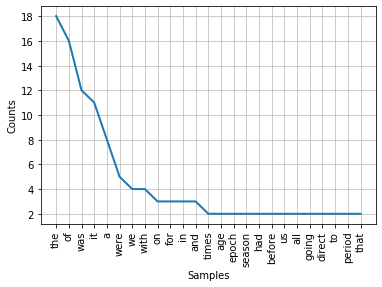

In [20]:
#nltk's FreqDist is really nice. You can even plot the top n words
#as follows
word_frequencies.plot(25)

Note that this shape is typical of word frequency counts. That is, you will have some words that occur very frequently, while most others do not occur very often.

In [18]:
#What if we did not have nltk? How would you get the word counts?
from collections import Counter
c = Counter(words)
c.most_common(10)

[('the', 18),
 ('of', 16),
 ('was', 12),
 ('it', 11),
 ('a', 8),
 ('were', 5),
 ('we', 4),
 ('with', 4),
 ('on', 3),
 ('for', 3)]

Word clouds are useful for visually representing dominant words that appear in text. There is a Python module called "wordcloud" (surprise!) that can be easily used for this purpose (see https://github.com/amueller/word_cloud). However, let us have some fun by writing one ourselves. Of course, the code given below is not original. It is adapted from a wonderful book called "Data Science from Scratch" by Joel Grus. It is a great book for those who wish to get into data science. Details of the book are given below:

Data Science from Scratch by Joel Grus, O'Reilly Media, Inc., 2015 (ISBN: 978-1-491-90142-7).

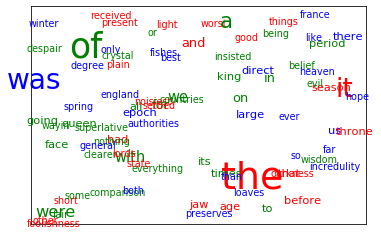

In [52]:
import matplotlib.pyplot as plt
 
def text_size(count):
    return 8 + (count / 18) * 30 #More frequent words will have larger fonts
#let us create some arbitrary coordinates
import random
coordinates = set()
while len(coordinates) < len(c):
    x = random.randint(2,390)
    y = random.randint(2,390)
    coordinates.add((x,y))
    

for i, word in enumerate(c):
    plt.text(list(coordinates)[i][0], list(coordinates)[i][1],
             word, ha = 'center', va = 'center', 
             color = random.choice(['r','g','b']), 
             size = text_size(c[word]))
   
plt.axis([0, 400, 0, 400])
plt.xticks([])
plt.yticks([])
plt.show()


This is clearly not the kind of word cloud you might have had in mind. Nevertheless, it gives you an idea of how one might create a word cloud. Experiment with it.

In [21]:
#Part of Speech Analysis -- to determine the part-of-speech of words that
#are used
import spacy #we will use spacy in this example
# Load the large English model
nlp = spacy.load('en_core_web_lg')
s = "Python is by far the easiest and most versatile language I have encountered."
# Use spacy (i.e., nlp) to turn the string into a spacy doc
doc = nlp(s)

# doc will contain tokens/words that we need to iterate over to
#get their parts of speech
[(token.text, token.pos_) for token in doc]

[('Python', 'PROPN'),
 ('is', 'AUX'),
 ('by', 'ADP'),
 ('far', 'ADV'),
 ('the', 'DET'),
 ('easiest', 'ADJ'),
 ('and', 'CCONJ'),
 ('most', 'ADV'),
 ('versatile', 'ADJ'),
 ('language', 'NOUN'),
 ('I', 'PRON'),
 ('have', 'AUX'),
 ('encountered', 'VERB'),
 ('.', 'PUNCT')]

In [22]:
#Let us use nltk to get the POS tags
#Convert the previous string to words
words = s[:-1].split() #I am ignoring the last character, a period
nltk.pos_tag(words)

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('by', 'IN'),
 ('far', 'RB'),
 ('the', 'DT'),
 ('easiest', 'JJS'),
 ('and', 'CC'),
 ('most', 'RBS'),
 ('versatile', 'JJ'),
 ('language', 'NN'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('encountered', 'VBN')]

Not surprisingly, we get very similar results. Spacy and nltk use somewhat different annotations. For example, spacy used "PROPN" while nltk uses "NNP" for proper nouns. "is" was marked as "AUX" (an auxiliary verb) in spacy but "VBZ" (third person singular verb). Spacy's annotation may be found at the following site:

https://spacy.io/api/annotation

NLTK's pos tag list is given below (thanks to: https://medium.com/@muddaprince456/categorizing-and-pos-tagging-with-nltk-python-28f2bc9312c3)

CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective ‘big’
JJR adjective, comparative ‘bigger’
JJS adjective, superlative ‘biggest’
LS list marker 1)
MD modal could, will
NN noun, singular ‘desk’
NNS noun plural ‘desks’
NNP proper noun, singular ‘Harrison’
NNPS proper noun, plural ‘Americans’
PDT predeterminer ‘all the kids’
POS possessive ending parent’s
PRP personal pronoun I, he, she
PRP$ possessive pronoun my, his, hers
RB adverb very, silently,
RBR adverb, comparative better
RBS adverb, superlative best
RP particle give up
TO, to go ‘to’ the store.
UH interjection, errrrrrrrm
VB verb, base form take
VBD verb, past tense, took
VBG verb, gerund/present participle taking
VBN verb, past participle is taken
VBP verb, sing. present, known-3d take
VBZ verb, 3rd person sing. present takes
WDT wh-determiner which
WP wh-pronoun who, what
WP$ possessive wh-pronoun whose
WRB wh-adverb where, when

In [27]:
#TextBlob is another useful Python module for text analysis
#let us try POS tags using textblob
from textblob import TextBlob
txt = TextBlob(s)
txt.tags


[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('by', 'IN'),
 ('far', 'RB'),
 ('the', 'DT'),
 ('easiest', 'JJS'),
 ('and', 'CC'),
 ('most', 'RBS'),
 ('versatile', 'JJ'),
 ('language', 'NN'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('encountered', 'VBN')]

We will now look at Named Entity Recognition (NER). The goal is to identify organizations, places/locations, people, dates, numbers, money, and so forth in text. These can be useful is assessing the specificity of text. Consider the following examples:

1. Google spent about $50 million a year on Deep Learning.
2. Companies spend a lot of money on emerging technologies.

Which of the two is more specific or concrete? Clearly, the first example provides specific context, while the second is very general. Let us use spacy to see how well it recognizes entities.

You may find the following reference useful: https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da


In [55]:
# Process a text
doc = nlp(u"Google spent about $50 million a year on Deep Learning")

# doc.ents has the predicted entities. Loop through each and display
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Google ORG
about $50 million MONEY


In [56]:
#let us try the second one
# Process a text
doc = nlp(u"Companies spend a lot of money on emerging technologies.")

# doc.ents has the predicted entities. Loop through each and display
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Note that cell above prints an empty list, as there are no identifiable entities in the text.

In [68]:
#Here is another example....
s = """The year 2020 has turned out to be catastrophic for the world.
Many lives have been lost - about a million in the US alone - and the
economy is in a shambles. Companies like Apple and Google are trying to
help, but the billions of dollars lost can never be recovered."""

doc = nlp(s)

# doc.ents has the predicted entities. Loop through each and display
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

The year 2020 DATE
about a million CARDINAL
US GPE
Apple ORG
Google ORG
the billions of dollars MONEY


In [69]:
#You can get an explanation for the entity by doing the following ...
spacy.explain('CARDINAL')

'Numerals that do not fall under another type'

In [67]:
spacy.explain('GPE')

'Countries, cities, states'

In [70]:
#Here is a cool way to embed the entities in the text
spacy.displacy.render(doc, jupyter = True, style = 'ent')

Incidentally, spacy.displacy can also visually display dependencies between words in a sentence, as shown below.

In [65]:
s = "Star Wars is an excellent movie."
doc = nlp(s)
spacy.displacy.render(doc, jupyter = True, style = 'dep',
                     options = {'distance': 100})

In [73]:
#Let us display noun phrases
#Noun phrases give us a gist of the text and can be useful in
#extracting keywords from text
s = """My car's warranty has expired, its registration has to be renewed, 
and a new driver's license may have to be obtained as well."""
doc = nlp(s)
for item in doc.noun_chunks:
    print(item)

My car's warranty
its registration
a new driver's license


In [74]:
#let us see what TextBlob does
txt = TextBlob(s)
txt.noun_phrases

WordList(["car 's warranty", "new driver 's license"])

Unigrams, Bigrams, Trigrams....ngrams

Unigrams are single words, while bigrams and trigrams are two and three words that occur together, respectively. For example, "United States" would be a bigram, and "linear regression model" would be an example of a trigram. It is customary for us to get lists of unigrams, bigrams, and trigrams and find their frequencies. You may also use them in topic modelling, where a topic may be defined in terms of any of these.

We will use nltks ngram method for this purpose.

In [78]:
s = """The United States of America is the best place in the world 
for advanced research. The linear regression model and other techniques 
were developed in the United States. Most machine learning courses 
place a lot of emphasis on the linear regression model. We know that 
machine learning is rapidly growing in the United States and other 
countries."""
words = nltk.wordpunct_tokenize(s)
unigram_counts = Counter(words)
bigrams = nltk.ngrams(words, 2)
bigram_counts = Counter(bigrams)
trigrams = nltk.ngrams(words, 3)
trigram_counts = Counter(trigrams)
print("Unigram top 5 words: ")
print(unigram_counts.most_common(5))
print("\nBigram - top 5 counts: \n")
print(bigram_counts.most_common(5))
print("\nTrigram - top 5 counts: \n")
print(trigram_counts.most_common(5))

Unigram top 5 words: 
[('the', 5), ('.', 4), ('United', 3), ('States', 3), ('in', 3)]

Bigram - top 5 counts: 

[(('United', 'States'), 3), (('in', 'the'), 3), (('linear', 'regression'), 2), (('regression', 'model'), 2), (('and', 'other'), 2)]

Trigram - top 5 counts: 

[(('linear', 'regression', 'model'), 2), (('in', 'the', 'United'), 2), (('the', 'United', 'States'), 2), (('The', 'United', 'States'), 1), (('United', 'States', 'of'), 1)]


Text Similarity

There is growing interest in assessing the similarity between texts. For example, one may use text similarity between two essays to see how similar they are. Or, one may look at patents from different companies to see how their innovations overlap or to assess the risk of a patent infringement. Likewise, business similarity between companies may also be discerned by looking at the similarity of their annual reports.

There are several ways to assess similarity between text:

1. Vectorize the words in the text - convert them to a list of number based on the frequency of occurrence of words or some weighted score for each word. The similarity between two texts can then be calculated using the vectors of those texts. Cosine similarity is what most people use.
2. Perform topic modelling on the text and use the probability distribution of each document across the topics as a vector of scores. The vectors can then be used to obtain text similarity.
3. Use pretrained models such as GLoVe (Global Vectors for Word Representation - see https://nlp.stanford.edu/projects/glove/ for details). This unsupervised learning algorithm provides vector representations for 100s of thousands of words. We can then use the vectors to compute similarity.

In this notebook, we will use en_vectors_web_lg from Spacy, which basically provides GLoVe vectors trained on Common Crawl (see Spacy's documentation for details). It consists of 685k keys and 685k unique vectors (300 dimensions). Let us get started with vector representations of common animals and see how similar they are.

In [79]:
import spacy
doc = "goat pig sheep boar cat dog lion puma tiger shark whale fish alligator crocodile"
nlp = spacy.load('en_vectors_web_lg')

In [80]:
tokens = nlp(doc)
#let us get the first 5 elements of vector for the first token "goat"
print(tokens[0].vector[:5])

[-0.85893 -0.11558  0.38278 -0.37396 -0.11016]


In [81]:
#How large is the vector?
len(tokens[0].vector)

300

In [82]:
#how similar is a goat to a pig?
print(tokens[0].similarity(tokens[1]))
#how similar is a goat to a sheep?
print(tokens[0].similarity(tokens[2]))

0.63421
0.7182427


In [83]:
#Let us create an array of similarities
import numpy as np
array = np.ones((len(tokens), len(tokens))) #square array filled with 1s
for row in range(len(tokens) - 1):
    for col in range(row, len(tokens)):
        sim = tokens[row].similarity(tokens[col])
        array[row][col] = sim
        array[col][row] = sim
#display array
print(array)

[[1.         0.63420999 0.7182427  0.6016466  0.38603598 0.43964866
  0.4703832  0.18229339 0.34363917 0.30794644 0.36724773 0.36817071
  0.40233487 0.4151119 ]
 [0.63420999 1.         0.64002073 0.57897091 0.54926527 0.56925416
  0.49023321 0.17442644 0.43495277 0.42430505 0.43393204 0.4944995
  0.45165887 0.45570442]
 [0.7182427  0.64002073 1.         0.52828884 0.38271171 0.46427047
  0.47781622 0.18111247 0.31490043 0.30267307 0.38690171 0.38460892
  0.2869868  0.39061809]
 [0.6016466  0.57897091 0.52828884 1.         0.3654899  0.39094374
  0.5312596  0.24728522 0.49289158 0.36420202 0.36524141 0.37074336
  0.51592857 0.47155023]
 [0.38603598 0.54926527 0.38271171 0.3654899  1.         0.80168551
  0.52654368 0.28332883 0.54133892 0.41694969 0.33757505 0.41806531
  0.35702607 0.32174614]
 [0.43964866 0.56925416 0.46427047 0.39094374 0.80168551 1.
  0.47424489 0.23041582 0.43654659 0.36990902 0.33376542 0.40854347
  0.37884989 0.29960123]
 [0.4703832  0.49023321 0.47781622 0.531259

In [87]:
#Let us put the array into a dataframe
import pandas as pd
columns = [token.text for token in tokens]
df = pd.DataFrame(array, columns = columns, index = columns)
df

,goat,pig,sheep,boar,cat,dog,lion,puma,tiger,shark,whale,fish,alligator,crocodile
goat,1.000000,0.634210,0.718243,0.601647,0.386036,0.439649,0.470383,0.182293,0.343639,0.307946,0.367248,0.368171,0.402335,0.415112
pig,0.634210,1.000000,0.640021,0.578971,0.549265,0.569254,0.490233,0.174426,0.434953,0.424305,0.433932,0.494500,0.451659,0.455704
sheep,0.718243,0.640021,1.000000,0.528289,0.382712,0.464270,0.477816,0.181112,0.314900,0.302673,0.386902,0.384609,0.286987,0.390618
boar,0.601647,0.578971,0.528289,1.000000,0.365490,0.390944,0.531260,0.247285,0.492892,0.364202,0.365241,0.370743,0.515929,0.471550
cat,0.386036,0.549265,0.382712,0.365490,1.000000,0.801686,0.526544,0.283329,0.541339,0.416950,0.337575,0.418065,0.357026,0.321746
dog,0.439649,0.569254,0.464270,0.390944,0.801686,1.000000,0.474245,0.230416,0.436547,0.369909,0.333765,0.408543,0.378850,0.299601
lion,0.470383,0.490233,0.477816,0.531260,0.526544,0.474245,1.000000,0.318494,0.735983,0.500839,0.467626,0.386064,0.459140,0.554625
puma,0.182293,0.174426,0.181112,0.247285,0.283329,0.230416,0.318494,1.000000,0.429310,0.262127,0.172337,0.100685,0.313484,0.320838
tiger,0.343639,0.434953,0.314900,0.492892,0.541339,0.436547,0.735983,0.429310,1.000000,0.604874,0.462114,0.479581,0.517587,0.531056
shark,0.307946,0.424305,0.302673,0.364202,0.416950,0.369909,0.500839,0.262127,0.604874,1.000000,0.742606,0.668223,0.574255,0.611740


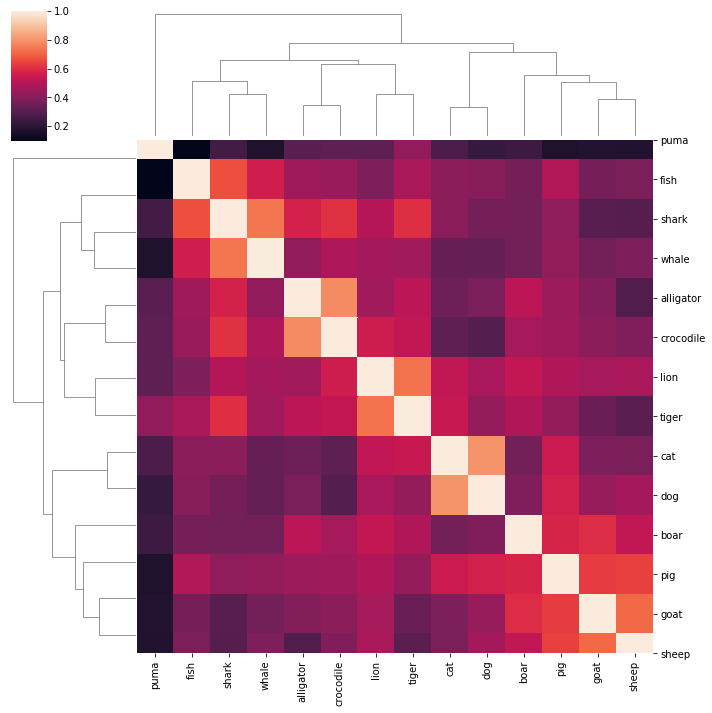

In [88]:
#let us use the dataframe to create a clustermap using seaborn
import seaborn as sns
sns.clustermap(df)

Do the clusters look reasonable? Puma should have clustered with lion and tiger, perhaps. The upper half seems to represent wild animals. The position of boar may also be questioned. Some of the pairings make sense - lion & tiger, alligator & crocodile, cat & dog, goat & sheep, and shark and whale.

We can try to access state-of-the-art architectures like BERT (Bidirectional Encoder Representations from Transformers) to see if our results improve. BERT came out of Google and is now widely used in Natural Language Processing (NLP). We can access BERT in spacy by using spacy-transformers. Specifically, we will use "en_trf_bertbaseuncased_lg".

In [89]:
nlp = spacy.load("en_trf_bertbaseuncased_lg")

In [90]:
doc = "goat pig sheep boar cat dog lion puma tiger shark whale fish alligator crocodile"
tokens = nlp(doc)

In [91]:
#How large is the vector?
len(tokens[0].vector)

768

In [92]:
#Let us create an array of similarities
import numpy as np
array = np.ones((len(tokens), len(tokens))) #square array filled with 1s
for row in range(len(tokens) - 1):
    for col in range(row, len(tokens)):
        sim = tokens[row].similarity(tokens[col])
        array[row][col] = sim
        array[col][row] = sim
#display array
print(array)

[[1.         0.83857888 0.81985289 0.78001136 0.78829926 0.75828779
  0.73498797 0.46429589 0.72311491 0.67728621 0.7114802  0.66742486
  0.69987607 0.69189185]
 [0.83857888 1.         0.8538872  0.86787921 0.83626682 0.84753215
  0.79638976 0.49886584 0.757743   0.72158992 0.76204717 0.71980387
  0.72346026 0.71397555]
 [0.81985289 0.8538872  1.         0.82495815 0.85086209 0.85316205
  0.82612401 0.54573178 0.78461361 0.73255348 0.77305031 0.75325793
  0.71552306 0.71294439]
 [0.78001136 0.86787921 0.82495815 1.00000012 0.81200874 0.84152162
  0.85183477 0.49065033 0.78820682 0.77347797 0.7818591  0.74861079
  0.77833414 0.77733231]
 [0.78829926 0.83626682 0.85086209 0.81200874 1.00000012 0.88157803
  0.8251797  0.54156214 0.85344082 0.76345527 0.7844764  0.73372293
  0.73709607 0.70906872]
 [0.75828779 0.84753215 0.85316205 0.84152162 0.88157803 1.
  0.91110182 0.54403365 0.85072613 0.8135801  0.80324632 0.80314487
  0.74036467 0.75454742]
 [0.73498797 0.79638976 0.82612401 0.85183

In [93]:
#Let us put the array into a dataframe
import pandas as pd
columns = [token.text for token in tokens]
df = pd.DataFrame(array, columns = columns, index = columns)
df

,goat,pig,sheep,boar,cat,dog,lion,puma,tiger,shark,whale,fish,alligator,crocodile
goat,1.000000,0.838579,0.819853,0.780011,0.788299,0.758288,0.734988,0.464296,0.723115,0.677286,0.711480,0.667425,0.699876,0.691892
pig,0.838579,1.000000,0.853887,0.867879,0.836267,0.847532,0.796390,0.498866,0.757743,0.721590,0.762047,0.719804,0.723460,0.713976
sheep,0.819853,0.853887,1.000000,0.824958,0.850862,0.853162,0.826124,0.545732,0.784614,0.732553,0.773050,0.753258,0.715523,0.712944
boar,0.780011,0.867879,0.824958,1.000000,0.812009,0.841522,0.851835,0.490650,0.788207,0.773478,0.781859,0.748611,0.778334,0.777332
cat,0.788299,0.836267,0.850862,0.812009,1.000000,0.881578,0.825180,0.541562,0.853441,0.763455,0.784476,0.733723,0.737096,0.709069
dog,0.758288,0.847532,0.853162,0.841522,0.881578,1.000000,0.911102,0.544034,0.850726,0.813580,0.803246,0.803145,0.740365,0.754547
lion,0.734988,0.796390,0.826124,0.851835,0.825180,0.911102,1.000000,0.582886,0.887506,0.822871,0.799719,0.802604,0.749773,0.768796
puma,0.464296,0.498866,0.545732,0.490650,0.541562,0.544034,0.582886,1.000000,0.564763,0.479253,0.505689,0.462316,0.448976,0.440452
tiger,0.723115,0.757743,0.784614,0.788207,0.853441,0.850726,0.887506,0.564763,1.000000,0.859870,0.856707,0.797839,0.813606,0.789961
shark,0.677286,0.721590,0.732553,0.773478,0.763455,0.813580,0.822871,0.479253,0.859870,1.000000,0.880443,0.886626,0.829433,0.826750


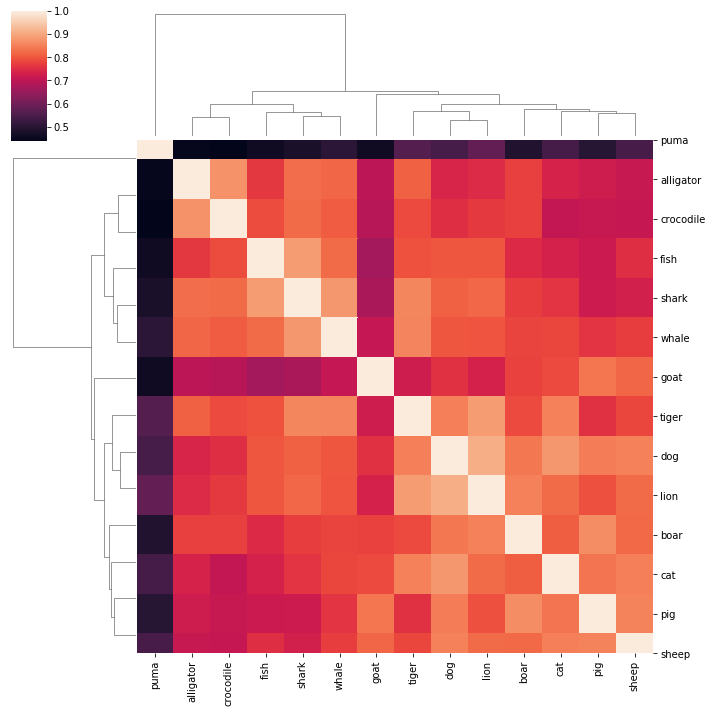

In [94]:
#let us use the dataframe to create a clustermap using seaborn
import seaborn as sns
sns.clustermap(df)

The results, surprisingly, are all over the place (except for a few exceptions). Looks like the 300-dimensional GLoVe embeddings did better. The corpus or corpora used to derive the vectors clearly matters.

Now, let us turn our attention to sentiment analysis. We will use nltk and textblob to get sentiments. If you are planning to use sentiments in your research, I would prefer to use APIs from Google, IBM, Microsoft Azure, or Amazon AWS to obtain sentiments. Some of the APIs, like IBMS's Tone Analyzer, provide several emotional tones - anger, joy, sadness, etc. - and not just positive or negative. Anyway, this notebook shows a quick and easy way to get sentiments.

In [96]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/snerur/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [98]:
s = "This is a great class. It is a lot of fun!"
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(s) 


{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.8268}

Shows a positive sentiment score of 0.524. Positive, negative, and neutral should add up to 1. In this case, the proportion of negative sentiment is 0. Compound is an overall sentiment that can range from -1 to 1 (negative to positive). A compound score of 0.8268 reflects a very positive sentiment.

In [100]:
#another example
s = "The plot of the movie was good but the acting was terrible"
analyzer.polarity_scores(s)

{'neg': 0.258, 'neu': 0.621, 'pos': 0.121, 'compound': -0.4939}

In [101]:
#let use textblob and get the sentiments
s1 = "This is a great class. It is a lot of fun!"
txt = TextBlob(s1)
txt.sentiment

Sentiment(polarity=0.5875, subjectivity=0.475)

In [102]:
#another example
s = "The plot of the movie was good but the acting was terrible"
txt = TextBlob(s)
txt.sentiment

Sentiment(polarity=-0.10000000000000002, subjectivity=0.5333333333333333)

Polarity ranges from -1 to 1 (negative to positive) and subjectivity from 0 to 1. Subjectivity tells you if it is an opinion or a factual statement (objectivity).

Measures of readability have been used extensively in the educational psychology literature. For example, readability measures can be used to automatically score students' essays. The ease of readability and sophistication have been associated with performance. Lately, researchers in accounting have been looking at the association between 10-k filings, annual reports, prospectuses, etc. and firm outcomes.

The following source was used to come up with the examples shown below.

Source: https://pypi.org/project/py-readability-metrics/

Installation:

pip install py-readability-metrics

python -m nltk.downloader punkt

In [103]:
from readability import Readability

In [104]:
#methods/readability measures available
help(Readability)

Help on class Readability in module readability.readability:

class Readability(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, text)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ari(self)
 |      Calculate Automated Readability Index (ARI).
 |  
 |  coleman_liau(self)
 |      Calculate Coleman Liau Index.
 |  
 |  dale_chall(self)
 |      Calculate Dale Chall.
 |  
 |  flesch(self)
 |      Calculate Flesch Reading Ease score.
 |  
 |  flesch_kincaid(self)
 |      Calculate Flesch-Kincaid Grade Level.
 |  
 |  gunning_fog(self)
 |      Calculate Gunning Fog score.
 |  
 |  linsear_write(self)
 |      Calculate Linsear Write.
 |  
 |  smog(self, all_sentences=False)
 |      SMOG Index.
 |      `all_sentences` indicates whether SMOG should use a sample of 30 sentences, as described in the original paper, or if it should use all sentences in the text
 |  
 |  spache(self)
 |      Spache Index.
 |  
 |  statistics(self)
 |  
 |  -------

This notebook will not explain the differences among these different measures of readability. You may use the reference provided above to get more information. A few examples are used to show how to compute the measures.

In [105]:
#Let us analyze the first two paragraphs of The Tale of Two Cities
s = """It was the best of times, it was the worst of times, it was the
age of wisdom, it was the age of foolishness, it was the epoch of belief,
it was the epoch of incredulity, it was the season of Light, it was the
season of Darkness, it was the spring of hope, it was the winter of
despair, we had everything before us, we had nothing before us, we were
all going direct to Heaven, we were all going direct the other way--in
short, the period was so far like the present period, that some of its
noisiest authorities insisted on its being received, for good or for
evil, in the superlative degree of comparison only.
There were a king with a large jaw and a queen with a plain face, on the
throne of England; there were a king with a large jaw and a queen with
a fair face, on the throne of France. In both countries it was clearer
than crystal to the lords of the State preserves of loaves and fishes,
that things in general were settled for ever."""

r = Readability(s)

In [106]:
#Gunning Fog
gf = r.gunning_fog()
print(gf.score)
print(gf.grade_level)

26.61261261261261
college_graduate


In [107]:
#Flesch
f = r.flesch()
print(f.score)
print(f.ease)
print(f.grade_levels)

33.577387387387404
difficult
['college']


In [108]:
#Flesch-Kincaid
fk = r.flesch_kincaid()
print(fk.score)
print(fk.grade_level)

23.279009009009012
23


This concludes our introduction to text analysis. Hope you had fun.